<a href="https://colab.research.google.com/github/ZenoZoldyck/Kaggle_competions/blob/main/Tabular_playground_series_june.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

tf.__version__

'2.5.0'

In [3]:
train = pd.read_excel("/content/train.xlsx")
test = pd.read_csv("/content/test.csv")

In [4]:
train.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
0,0,0,0,6,1,0,0,0,0,7,0,0,0,3,0,1,0,0,3,3,1,0,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,11,0,0,0,0,0,9,0,0,0,0,0,0,3,0,1,3,0,0,0,0,0,0,0,1,1,0,0,3,0,0,0,0,0,0,2,0,0,5
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,5
2,2,0,0,0,0,0,1,0,3,0,0,1,0,0,0,0,0,0,0,0,5,4,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,5,0,5,0,1,0,0,0,1,0,0,1,0,7,0,1,1,0,3,4,0,0,1,3,0,2,0,0,8,0,0,0,0,1,0,0,0,0,1
3,3,0,0,7,0,1,5,2,2,0,1,2,0,5,0,0,4,0,0,22,2,1,0,0,0,0,3,0,37,0,1,3,13,0,10,0,3,1,1,0,7,0,0,2,0,1,0,0,0,0,0,0,10,0,0,25,1,0,1,2,0,2,0,7,0,0,0,0,4,0,2,2,0,4,3,0,7
4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [5]:
train_label = train["target"]
train_data = train.drop(["id", "target"], axis = "columns")

In [6]:
train_label = np.array(train_label)
train_label = tf.one_hot(train_label, depth=9)

In [7]:
train_label[0]

<tf.Tensor: shape=(9,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)>

In [8]:
train_data = np.array(train_data)
train_data[0]

array([ 0,  0,  6,  1,  0,  0,  0,  0,  7,  0,  0,  0,  3,  0,  1,  0,  0,
        3,  3,  1,  0,  2,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,
        0,  0,  0, 11,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  3,
        0,  1,  3,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  3,  0,  0,
        0,  0,  0,  0,  2,  0,  0])

In [13]:
model_1 = tf.keras.Sequential([
   tf.keras.layers.Dense(64, activation = "relu"),
   tf.keras.layers.BatchNormalization(),
   tf.keras.layers.Dense(128, activation = "relu"),
   tf.keras.layers.BatchNormalization(),
   tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Dense(64, activation = "relu"),
   tf.keras.layers.Dense(9, activation = "softmax")                         
])

model_1.compile(loss = tf.keras.losses.mse,
              optimizer = tf.keras.optimizers.Adam(lr = 0.0005),
              metrics = ["accuracy"])

history = model_1.fit(train_data, train_label, epochs = 100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
6250/6250 [==============================] - 15s 2ms/step - loss: 0.0887 - accuracy: 0.3279
Epoch 2/100
6250/6250 [==============================] - 14s 2ms/step - loss: 0.0867 - accuracy: 0.3456
Epoch 3/100
6250/6250 [==============================] - 14s 2ms/step - loss: 0.0864 - accuracy: 0.3486
Epoch 4/100
6250/6250 [==============================] - 14s 2ms/step - loss: 0.0862 - accuracy: 0.3506
Epoch 5/100
6250/6250 [==============================] - 14s 2ms/step - loss: 0.0860 - accuracy: 0.3526
Epoch 6/100
6250/6250 [==============================] - 14s 2ms/step - loss: 0.0859 - accuracy: 0.3538
Epoch 7/100
6250/6250 [==============================] - 14s 2ms/step - loss: 0.0858 - accuracy: 0.3548
Epoch 8/100
6250/6250 [==============================] - 14s 2ms/step - loss: 0.0857 - accuracy: 0.3562
Epoch 9/100
6250/6250 [==============================] - 14s 2ms/step - loss: 0.0856 - accuracy: 0.3570
Epoch 10/100
6250/6250 [==============================] - 14s 2m

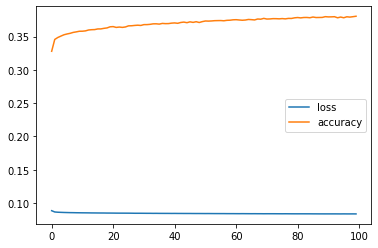

In [14]:
pd.DataFrame(history.history).plot()

In [16]:
test = test.drop(["id"], axis="columns")

In [17]:
test = np.array(test)

In [18]:
test[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
y_preds = model_1.predict(test)

In [20]:
y_val = pd.DataFrame(y_preds)

In [22]:
y_val.to_csv("yahoo.csv")